Libraries

In [17]:
import os # os module provides functions to interact with operating systems
import tarfile
import urllib # to make http requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix

Data Loading

In [3]:
Download_Root="http://raw.githubusercontent.com/ageron/handson-ml2/master/"
Housing_Data_Path=os.path.join("datasets","housing")
Housing_URL=Download_Root+"datasets/housing/housing.tgz"

def fetch_housing_data(Housing_URL=Housing_URL, Housing_Data_Path=Housing_Data_Path):
  os.makedirs(Housing_Data_Path, exist_ok=True) # Creating the folders "datasets" & subfolder "housing"
  tgz_path=os.path.join(Housing_Data_Path,"housing.tgz") # Creating a path to load the data in future
  if ~os.path.exists(tgz_path):
    urllib.request.urlretrieve(Housing_URL,tgz_path) # Retrieving the online data
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=Housing_Data_Path)
    housing_tgz.close()
  else:
    print("Data is present and has is not extracted again from source")

def load_housing_data():
  fetch_housing_data()
  data_path=os.path.join(Housing_Data_Path,"housing.csv")
  return pd.read_csv(data_path)

In [4]:
housing_data_df=load_housing_data()
housing_data_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Understanding the Data

In [5]:
housing_data_df.info() # Gives us basic info about the data (i.e Non-Null Count, Dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing_data_df["ocean_proximity"].value_counts() # Gives distinct values present in a categorical label and their associated counts

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [7]:
housing_data_df.describe() # Gives numerical summary of the data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


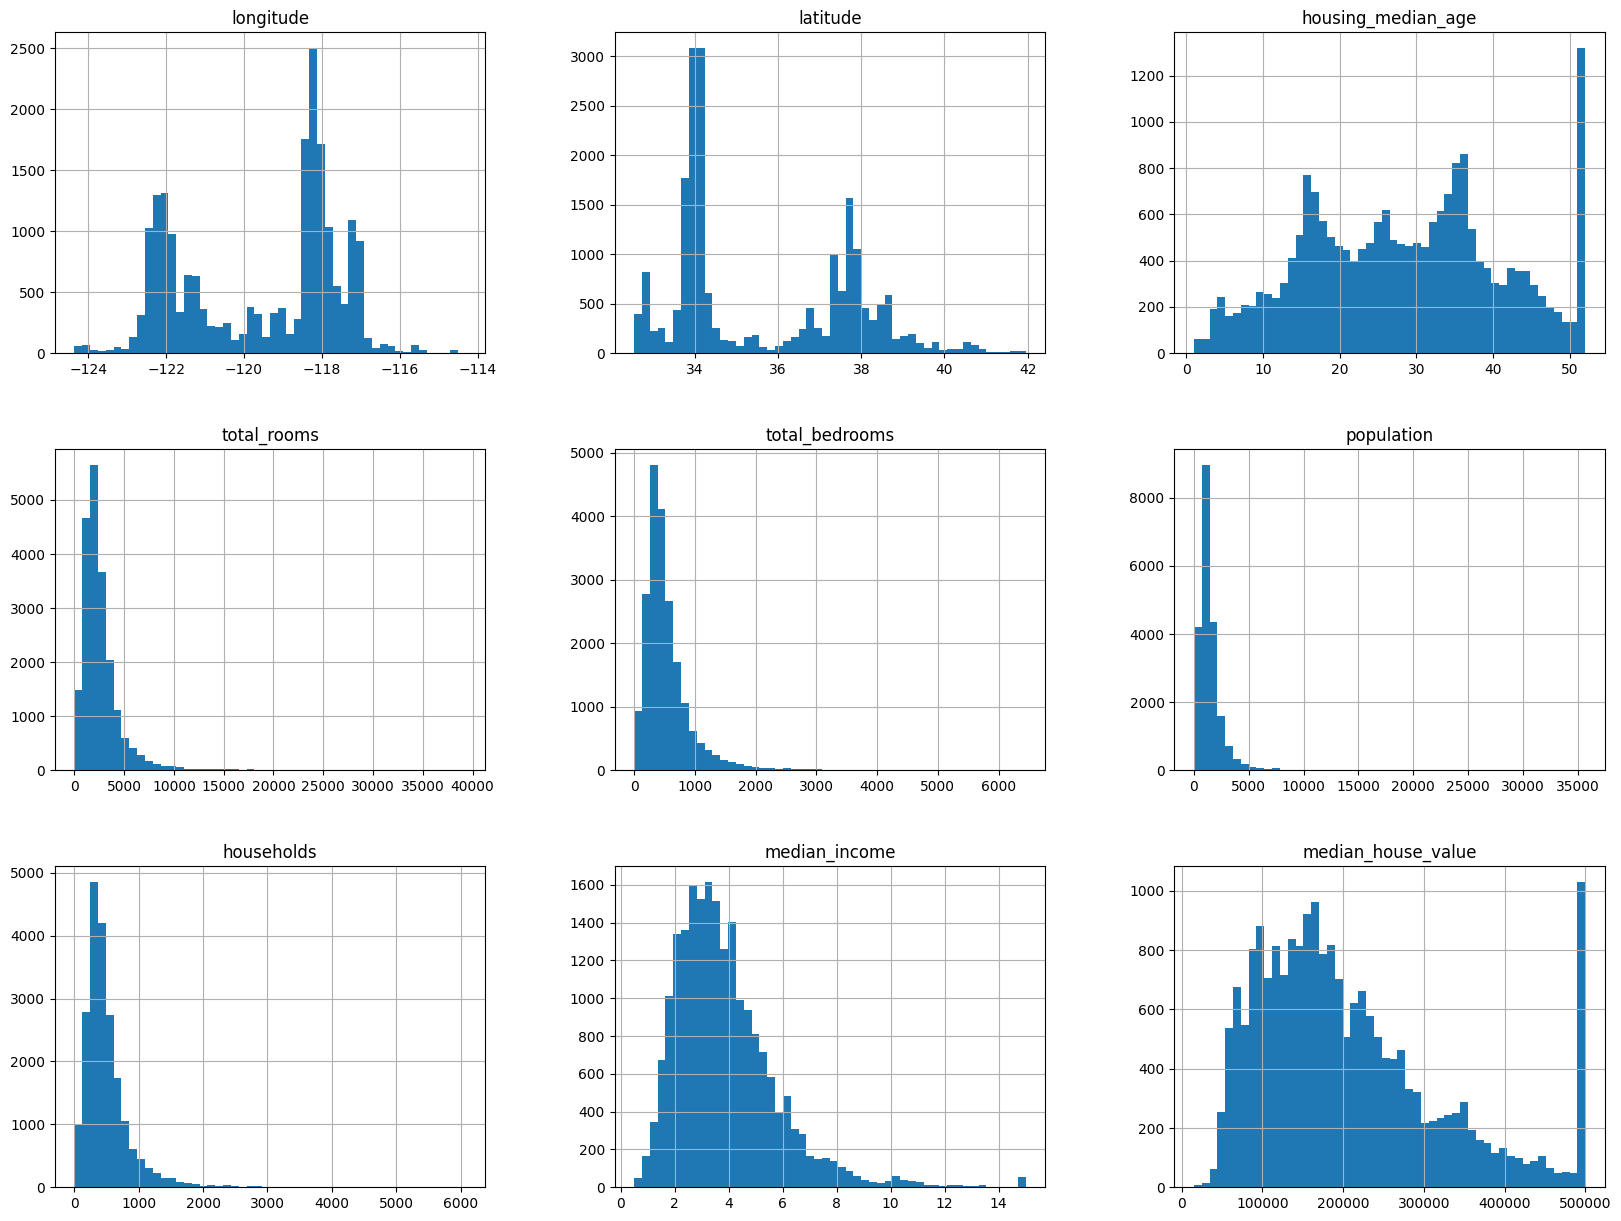

In [8]:
housing_data_df.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

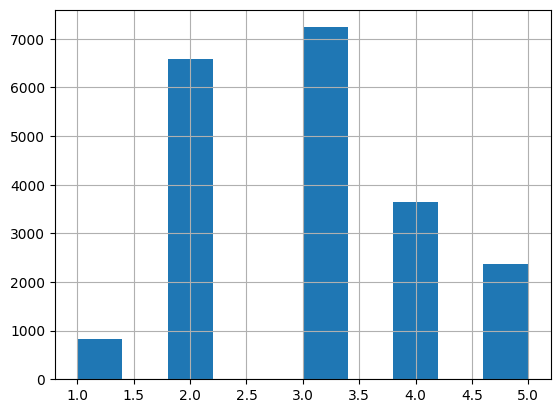

In [11]:
housing_data_df['median_cat']=pd.cut(housing_data_df['median_income'],bins=[0, 1.5, 3.0, 4.5, 6, np.inf],labels=[1,2,3,4,5])
housing_data_df['median_cat'].hist()

<Axes: xlabel='longitude', ylabel='latitude'>

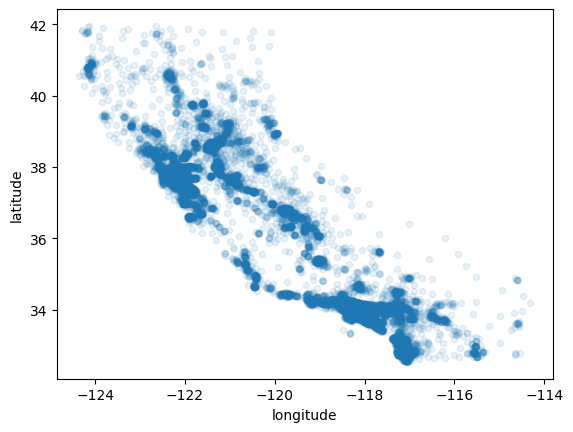

In [15]:
housing_data_df.plot(kind='scatter',y='latitude', x='longitude', alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

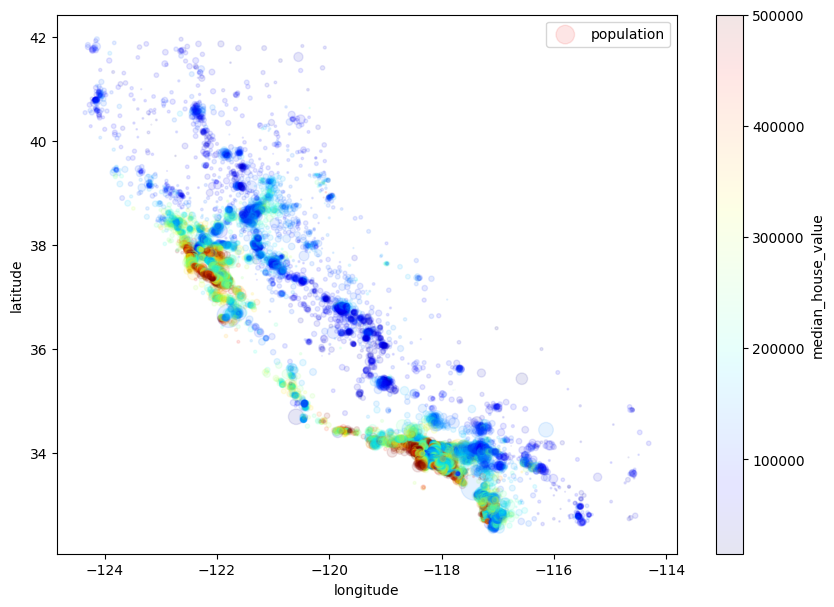

In [16]:
housing_data_df.plot(kind='scatter',y='latitude', x='longitude', alpha=0.1, s=housing_data_df['population']/100, label="population", figsize=(10,7),c='median_house_value',cmap=plt.get_cmap("jet"),colorbar=True)

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

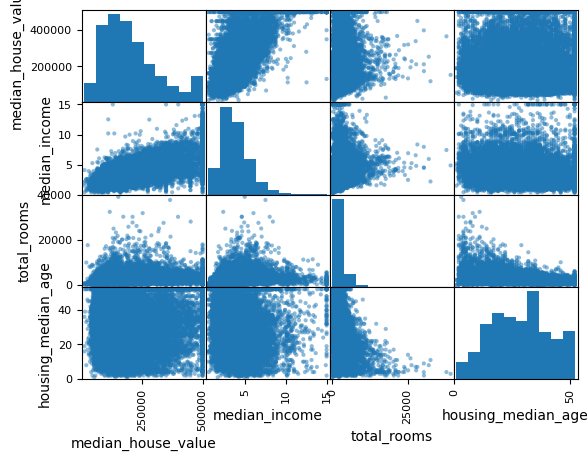

In [18]:
attributes=['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing_data_df[attributes])